Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All) to avoid typical problems with Jupyter notebooks. **Unfortunately, this does not work with Chrome right now, you will also need to reload the tab in Chrome afterwards**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". Please put your name here:

In [1]:
NAME = " Aymane Hachcham "

---

# Basic text data processing

In this assignment, you will practise some basic text data processing skills, and get to explore a data set

## Load and tokenize the Hamlet data set

Load the Hamlet data set, and tokenize it into suitable words (omit punctuation!).

You may choose a very basic tokenization approach, such as the one from the lecture introduction (despite its limitations).

In [9]:
import gzip, re
import string
# You can add some setup code here (e.g., re.compile)
pattern = '[.:,;?!]\s\n'

# YOUR CODE HERE
# raise NotImplementedError()

tokenized = list() # Store your output in this list
for line in gzip.open("/data/datasets/shakespeare-hamlet.txt.gz", "rt"):
    """Process the Hamlet data line by line"""
    list_tokens = re.split(pattern, line)
    [tokenized.append(item) for item in list_tokens]
#     line = line.translate(str.maketrans('', '', string.punctuation))
#     [tokenized.append(item) for item in line.lower().split() if len(item) > 1]
    
#     raise NotImplementedError()

# print("Hamlet contains %d words total, %d unique." % (len(tokenized), len(set(tokenized))))
print(tokenized)

['[The Tragedie of Hamlet by William Shakespeare 1599]\n', '\n', '\n', 'Actus Primus. Scoena Prima.\n', '\n', 'Enter Barnardo and Francisco two Centinels.\n', '\n', "  Barnardo. Who's there?\n", '  Fran. Nay answer me: Stand & vnfold\n', 'your selfe\n', '\n', '   Bar. Long liue the King\n', '\n', '   Fran. Barnardo?\n', '  Bar. He\n', '\n', '   Fran. You come most carefully vpon your houre\n', '\n', "   Bar. 'Tis now strook twelue, get thee to bed Francisco\n", '\n', "   Fran. For this releefe much thankes: 'Tis bitter cold,\n", 'And I am sicke at heart\n', '\n', '   Barn. Haue you had quiet Guard?\n', '  Fran. Not a Mouse stirring\n', '\n', '   Barn. Well, goodnight. If you do meet Horatio and\n', 'Marcellus, the Riuals of my Watch, bid them make hast.\n', 'Enter Horatio and Marcellus.\n', '\n', "  Fran. I thinke I heare them. Stand: who's there?\n", '  Hor. Friends to this ground\n', '\n', '   Mar. And Leige-men to the Dane\n', '\n', '   Fran. Giue you good night\n', '\n', "   Mar. O

In [2]:
##### Some automatic tests for your solution:
assert not "" in tokenized, "The empty string is not a suitable token!"
assert not "Make" in tokenized, "You probably want to only consider lowercase words"
assert len(tokenized) < 35000, "You generated way too many tokens, check your result!"
assert len(tokenized) > 25000, "You generated rather few tokens, check your result!"
assert len(set(tokenized)) < 5000, "You have a fairly large vocabulary. Can you reduce it further?"
assert len(set(tokenized)) > 4000, "You have a fairly small vocabulary. Did you lose some contents?"

## Find the most common words in the corpus

Find the 20 most common words in the corpus.

Store them along with the counts in the variable `most_common`

In [17]:
from collections import Counter # you will find this class useful
most_common = [] # store your output in this variable


# YOUR CODE HERE

# Correction:
counter = Counter(tokenized)
most_common = Counter.most_common(20)
###################################
counter = dict()
for x in tokenized:
    counter[x] = counter.get(x, 0) + 1

most_common = sorted(counter.items(), key = lambda x:x[-1][:20])
###################################

Counter = Counter(tokenized)
most_common = Counter.most_common(20)

# raise NotImplementedError()
print(most_common)

# Print the most common words:
for word, count in most_common: print(word, count, sep="\t")

[('the', 993), ('and', 862), ('to', 683), ('of', 610), ('you', 522), ('my', 502), ('it', 415), ('in', 384), ('that', 361), ('ham', 337), ('is', 315), ('not', 300), ('his', 285), ('this', 275), ('with', 254), ('your', 253), ('but', 249), ('for', 241), ('me', 228), ('lord', 212)]
the	993
and	862
to	683
of	610
you	522
my	502
it	415
in	384
that	361
ham	337
is	315
not	300
his	285
this	275
with	254
your	253
but	249
for	241
me	228
lord	212


In [18]:
##### Some automatic tests for your solution:
assert len(most_common) == 20, "You were expected to return 20 results!"
assert len(set([x for x,y in most_common])) == 20, "Your words were not unique?!?"
assert most_common[0][0] == "the", "The most common word is incorrect (did you already remove stopwords above?)"
assert most_common[1][0] == "and", "The second most common word is incorrect (did you already remove stopwords above?)"
assert sum([y for x,y in most_common]) > 5000, "Your most common words cover rather little of the data."
assert sum([y for x,y in most_common]) < 10000, "Your most common words cover unusally much"

## Remove English Stopwords

Load the file `english-stopwords.txt.gz` and remove the stop words from the token list.

In [19]:
filtered_tokens=[] # Store your solution here

# print(tokenized)

# YOUR CODE HERE
# Correction:
stopwords = set(x.strip() for x in gzip.open("/data/datasets/english-stopwords.txt.gz", "rt"))

# Filtered tokens
filtered_tokens = [x in tokenized if not x in stopwords]

#######################
stopwords = []
with gzip.open("/data/datasets/english-stopwords.txt.gz", "rt") as file:
    stopwords = file.read().split('\n')
    
filtered_tokens = [word for word in tokenized if word not in stopwords]

print("Number of stopwords:", len(stopwords))
print("Size before removing:", len(tokenized))
print("Size after removing stopwords:", len(filtered_tokens))
print("Unique words before: %d and after: %d" % (len(set(tokenized)), len(set(filtered_tokens))))

Number of stopwords: 180
Size before removing: 28491
Size after removing stopwords: 15879
Unique words before: 4793 and after: 4693


In [20]:
##### Some automatic tests for your solution:
assert not "" in filtered_tokens, "The empty string is not a suitable token!"
assert not "the" in filtered_tokens, "There is still a stop word in your tokens!"
assert not "and" in filtered_tokens, "There is still a stop word in your tokens!"
assert len(filtered_tokens) < 20000, "You generated way too many tokens, check your result!"
assert len(filtered_tokens) > 15000, "You generated rather few tokens, check your result!"
assert len(set(filtered_tokens)) < 5000, "You have a fairly large vocabulary. Can you reduce it further?"
assert len(set(filtered_tokens)) > 4000, "You have a fairly small vocabulary. Did you lose some contents?"

## Find the most frequent words after stopword removal

Find the 20 most common words in the filtered text.

Store them along with the counts in the variable `filtered_most_common`

In [21]:
from collections import Counter # you will find this class useful
filtered_most_common = [] # store your answer here

## Correction:

counter = Counter(filtered_tokens)
filtered_most_common = counter.most_common(20)

#######################
# YOUR CODE HERE
Counter = Counter(filtered_tokens)
filtered_most_common = Counter.most_common(20)
print(filtered_most_common)
# raise NotImplementedError()

# Print the most common words:
for word, count in filtered_most_common: print(word, count, sep="\t")

[('ham', 337), ('lord', 212), ('haue', 175), ('king', 171), ('shall', 107), ('thou', 105), ('come', 104), ('hamlet', 100), ('good', 98), ('hor', 95), ('let', 94), ('thy', 90), ('enter', 85), ('oh', 81), ('like', 77), ('well', 70), ('tis', 69), ('know', 69), ('would', 68), ('selfe', 67)]
ham	337
lord	212
haue	175
king	171
shall	107
thou	105
come	104
hamlet	100
good	98
hor	95
let	94
thy	90
enter	85
oh	81
like	77
well	70
tis	69
know	69
would	68
selfe	67


In [22]:
##### Some automatic tests for your solution:
assert len(filtered_most_common) == 20, "You were expected to return 20 results!"
assert len(set([x for x,y in filtered_most_common])) == 20, "Your words were not unique?!?"
assert sum([y for x,y in filtered_most_common]) > 1800, "Your most common words cover rather little of the data."
assert sum([y for x,y in filtered_most_common]) < 3000, "Your most common words cover unusally much"

## Make a frequency plot of the most common 100 words

Explore Zipf's law by plotting the frequencies of the 100 most common words.

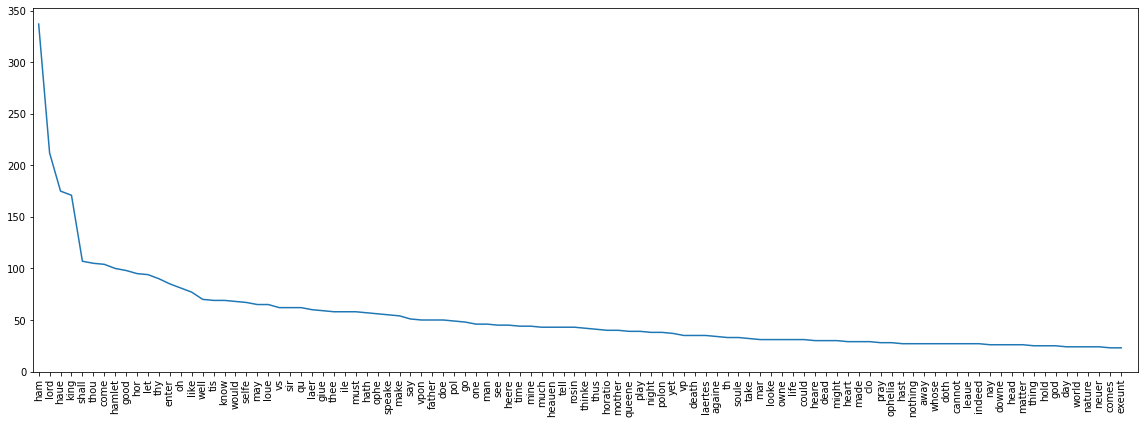

In [28]:
import matplotlib.pyplot as plt # use this library
import numpy as np

values, labels = [], [] # store your data here

# YOUR CODE HERE

## Correction:
hundred_most_common = Counter.most_common(100)
labels, values = zip(*hundred_most_common)

#######################

hundred_most_common = Counter.most_common(100)
labels, values = zip(*hundred_most_common)
# print(values)
# raise NotImplementedError()

# Visualize the data
plt.figure(figsize=(16,6))
plt.plot(np.arange(len(values)) + 1.5, values)
plt.xticks(np.arange(len(values)) + 1.5, labels, rotation='vertical')
plt.xlim(1, len(values)+2);plt.ylim(0)
plt.tight_layout();plt.show()

## Log-log Plot

Plot the word frequencies, sorted descendingly, in log-log-space

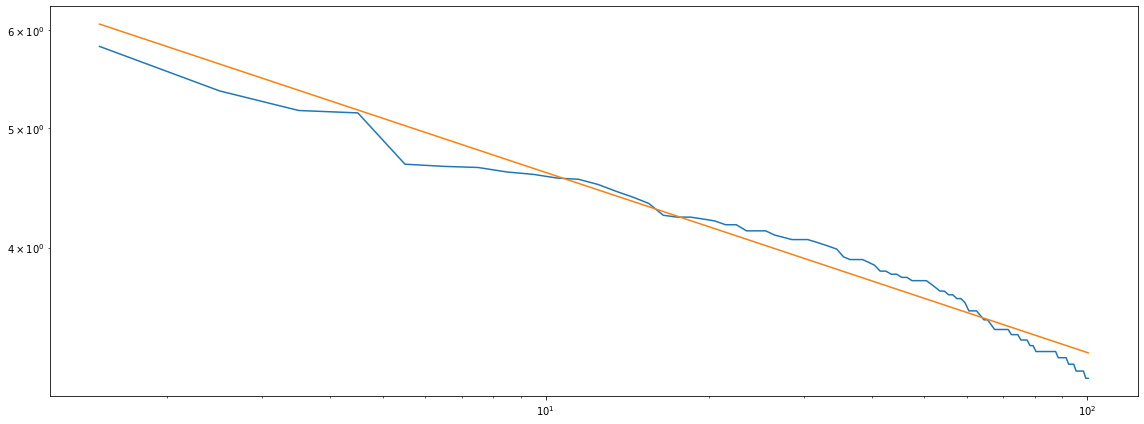

In [31]:
import numpy as np

# Also plot in logspace, this should look approximately linear
values = [] # store your data here

# YOUR CODE HERE

# Correction:

I 

##############################

words = Counter.most_common(100)
labels, values = zip(*words)

values = np.log(values)

X = np.arange(len(values)) + 1.5 # for plotting below
# Linear fit
from sklearn.linear_model import LinearRegression
l = LinearRegression()
l.fit(np.log(X).reshape((-1,1)), np.log(values))

plt.figure(figsize=(16,6))
plt.plot(X, values, label="data")
plt.plot(X, np.exp(np.log(X)*l.coef_+l.intercept_), label="fit")
plt.xscale("log");plt.yscale("log")
plt.tight_layout();plt.show()

In [32]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()
X = np.arange(len(values)) + 1.5
l.fit(np.log(X).reshape((-1,1)), np.log(values))
assert l.coef_ < 0, "Curve must be decreasing"
assert l.intercept_ > 1, "Curve must start higher"
assert l.score(np.log(X).reshape((-1,1)), np.log(values)) > 0.9, "Unusually large error."

The plot should be reasonably approximated by a straight line in the log-log-plot, as seen in the lecture.